In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.shape

(267, 9)

There are total 9 features and 267 records

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
# Columns renaming
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']

#### Convert 'Date' to datetime and 'Frequency' to a categorical variable

In [8]:
import calendar
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')

In [9]:
# Extract month and month abbreviation
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [10]:
df.drop(columns='Month', inplace=True)

In [11]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


### Exploratory Data Analysis

In [12]:
# Statistics by Region
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<AxesSubplot:>

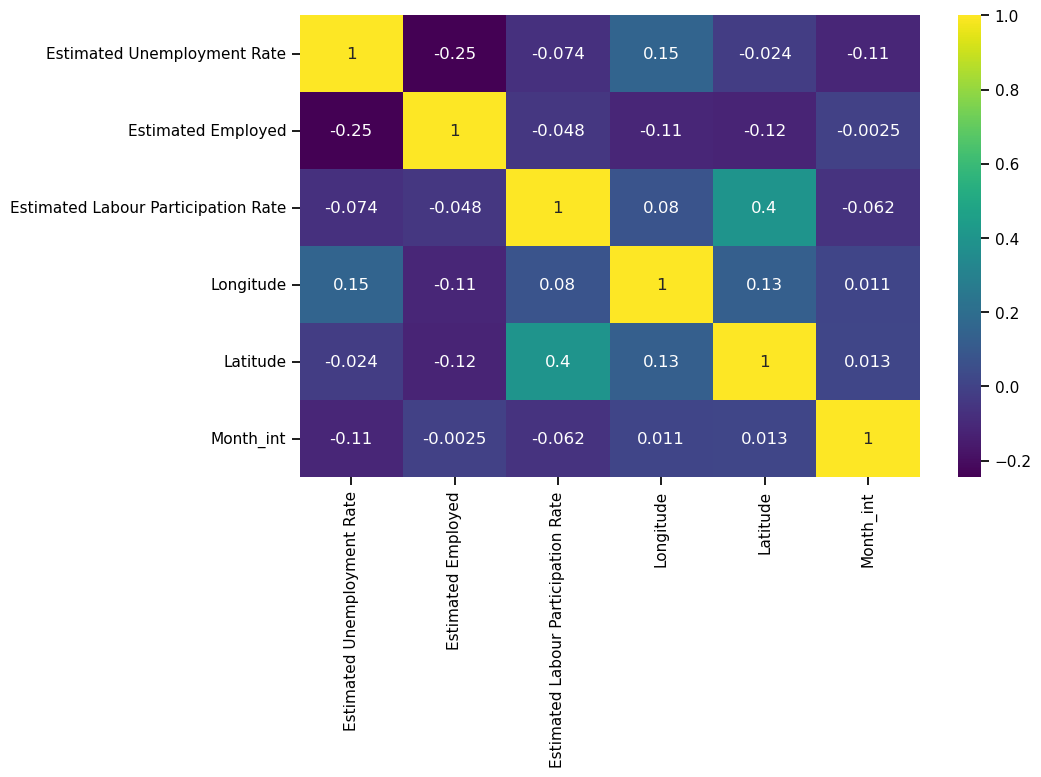

In [13]:
# Correlation Heatmap
heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Longitude', 'Latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='viridis')

<AxesSubplot:xlabel='Estimated Unemployment Rate', ylabel='States'>

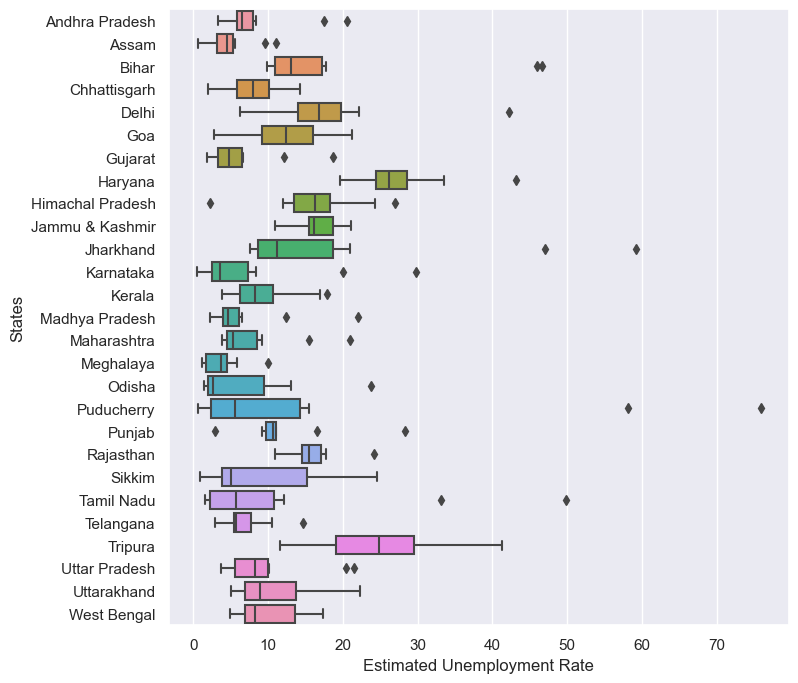

In [14]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.boxplot(x=df["Estimated Unemployment Rate"],y=df["States"])

[Text(0.5, 1.0, 'Average Unemployment Rate in each state')]

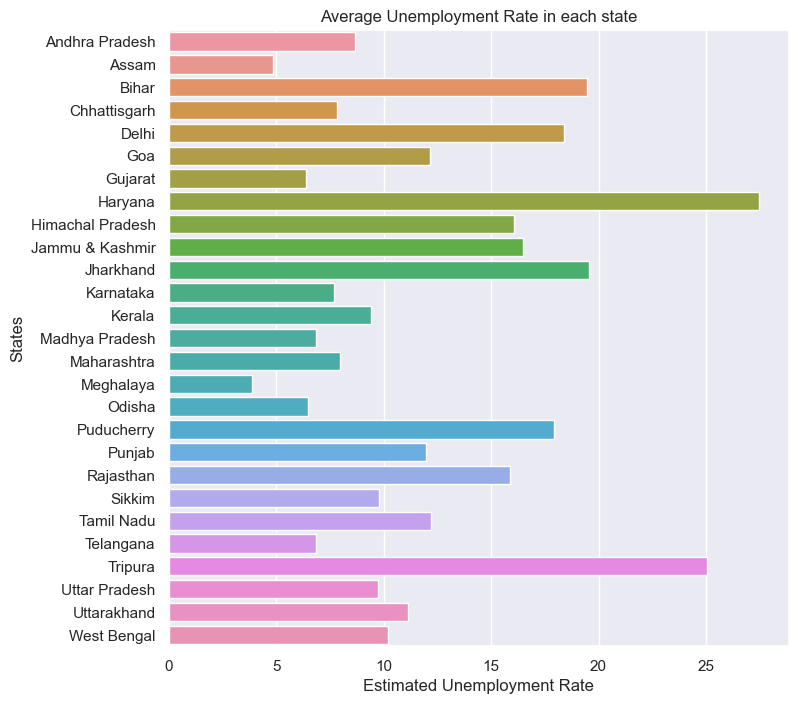

In [15]:
plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
sns.barplot(x=df_unemp['Estimated Unemployment Rate'],y=df_unemp['States']).set(title='Average Unemployment Rate in each state')

### Impact of Lockdown on States Estimated Employed
On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

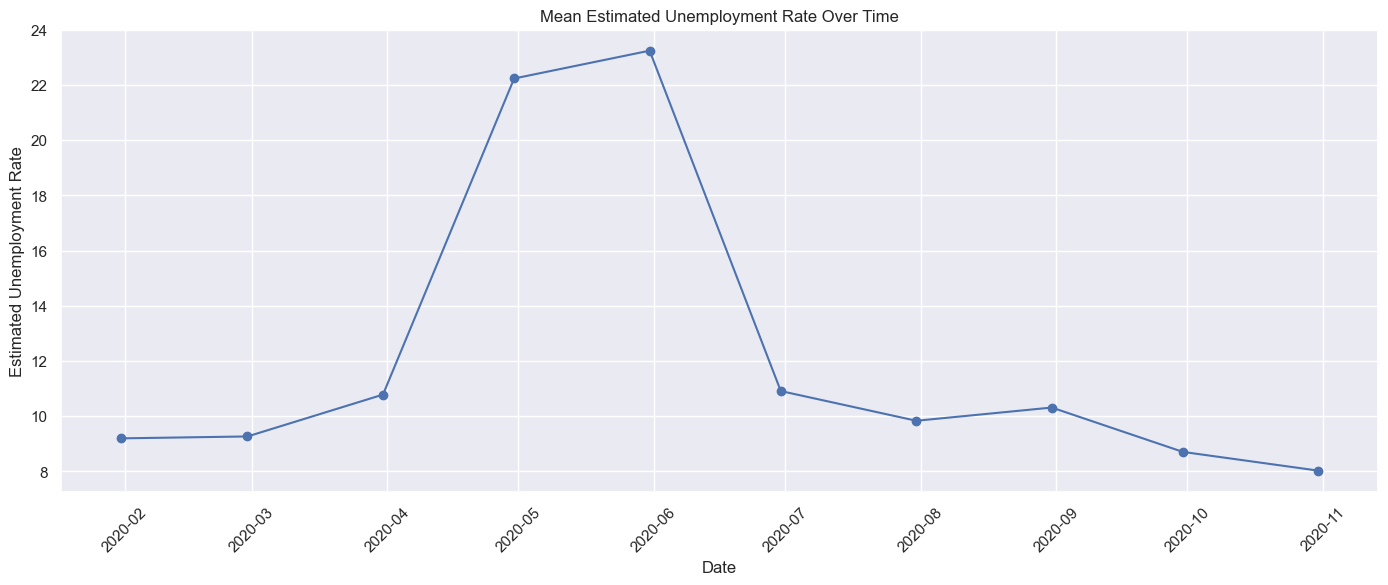

In [28]:
grouped = df.groupby('Date')['Estimated Unemployment Rate'].mean().reset_index()
plt.figure(figsize=(17, 6))
plt.plot(grouped['Date'], grouped['Estimated Unemployment Rate'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Calculate Unemployment Rate before and after lockdown

lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <= 7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <= 4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head()

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [19]:
# Calculate percentage change in unemployment rate

g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')

[Text(0.5, 1.0, 'Percentage change in Unemployment in each state after lockdown')]

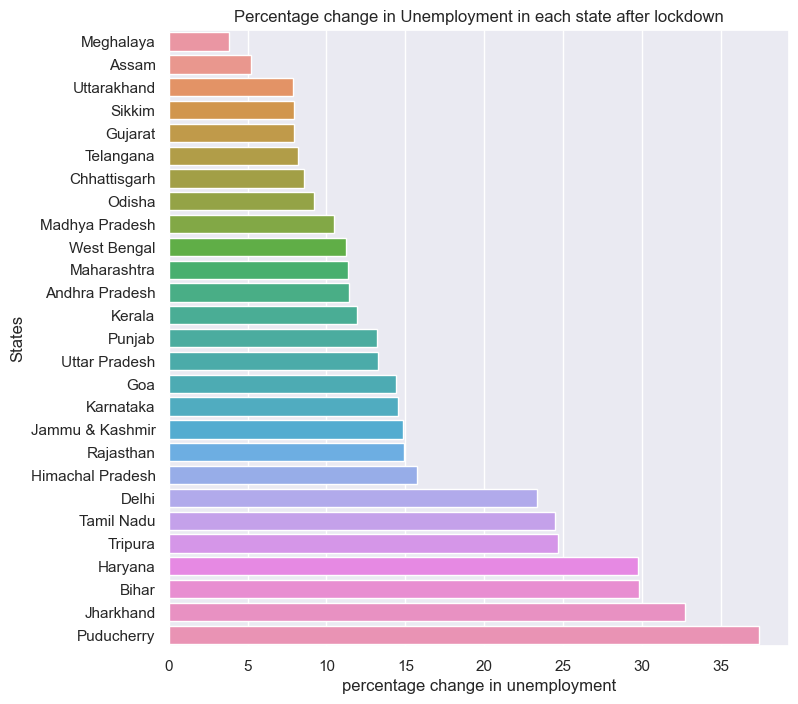

In [20]:
# Bar plot of percentage change in unemployment after lockdown

plot_per = g_lock.sort_values('percentage change in unemployment')
sns.barplot(y=plot_per["States"], 
             x=plot_per["percentage change in unemployment"]).set(title='Percentage change in Unemployment in each state after lockdown')


### Most impacted States/Union Territories
* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura